# Capstone Web Scraping using BeautifulSoup

This project is about web scraping, getting data from web pages without the API provided by the web page's owner. With webscraping we can get table data, text data from web pages that we can later transform into a more suitable format for data processing. The process of web scraping add to the possible sources of data we can use. In this particular project, I want to use web scraping to get the exchange rates between US Dollar (USD) and Indonesian Rupiah (IDR) from [this web site](https://www.exchange-rates.org/history/IDR/USD/T). The data that I am going to get are the dates for the exchange rate values and the values of 1 USD in IDR.


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content to see what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` In order to do this I put the cursor over the table, right-click, and select inspect element. The key that covers the whole table turns out to be 'table' or 'tbody'. I choose to use 'table' as key. Because the table key is accompanied by a class, I choose to add the class in the attrs (attributes) parameter in the beautifulsoup's find method. Then to check the part of code encapsulated by the key table, I use the prettify method and limit the output to 500 characters.

In [4]:
table = soup.find('table',attrs={'class': 'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[:500])

<table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    3/9/2021
   </td>
   <td>
    Tuesday
   </td>
   <td>
    <a href="/Rate/USD/IDR/3-9-2021">
     14,396.25662
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/3-9-2021">
     USD IDR rate for 3/9/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    3/8/2021
   </td>
   <td>
    Monday
   </td>
   <td>
    <a href="/Rate/USD/IDR/3-


After the key selection, then I am going to extract the text data from the table. The two types of data I am going to extract are the date of the exchange and the value of IDR in exchange for 1 USD. First, I prepared an empty list for the extracted data. Then I am going to find all the 'tr' keys in the table object, which indicate table rows. Then I am going to loop over all the 'tr' keys, finding all the 'td' keys and saving them in a variable named 'cells'. I found that the length of the 'cells' array can differ between rows. so I put a condition that if the length of the 'cells' array is more than 2 then I will extract the date stored in cells[0] and the IDR value stored in cells[2]. After that I will append both of them to the empty list I prepared before the loop. After the loop is finished, I reverse the list so that entries with earlier dates will be on top and entries with later dates will be on bottom. 

In [5]:
temp = [] #initiating a tuple
tr = table.find_all('tr')
for i in range(len(tr)):
    cells = tr[i].find_all('td')
    if len(cells) > 2:
        date = cells[0].text
        value = cells[2].text
        date = date.strip()
        value = value.strip()
        temp.append([date, value])
    
temp = temp[::-1]
temp

[['9/10/2020', '14,871.58664 IDR'],
 ['9/11/2020', '14,865.27553 IDR'],
 ['9/13/2020', '14,876.45021 IDR'],
 ['9/14/2020', '14,864.65988 IDR'],
 ['9/15/2020', '14,843.44670 IDR'],
 ['9/16/2020', '14,807.88761 IDR'],
 ['9/17/2020', '14,829.41738 IDR'],
 ['9/18/2020', '14,730.71792 IDR'],
 ['9/20/2020', '14,728.84529 IDR'],
 ['9/21/2020', '14,701.43420 IDR'],
 ['9/22/2020', '14,751.85786 IDR'],
 ['9/23/2020', '14,825.54899 IDR'],
 ['9/24/2020', '14,888.78607 IDR'],
 ['9/25/2020', '14,855.63943 IDR'],
 ['9/27/2020', '14,859.98349 IDR'],
 ['9/28/2020', '14,892.32194 IDR'],
 ['9/29/2020', '14,880.93210 IDR'],
 ['9/30/2020', '14,867.44686 IDR'],
 ['10/1/2020', '14,822.66605 IDR'],
 ['10/2/2020', '14,852.30483 IDR'],
 ['10/5/2020', '14,797.90178 IDR'],
 ['10/6/2020', '14,857.67854 IDR'],
 ['10/7/2020', '14,705.58246 IDR'],
 ['10/8/2020', '14,692.93025 IDR'],
 ['10/9/2020', '14,679.27910 IDR'],
 ['10/12/2020', '14,677.85296 IDR'],
 ['10/13/2020', '14,687.35100 IDR'],
 ['10/14/2020', '14,696.21

## Creating data frame & Data wrangling

Put the array into dataframe

In [6]:
import pandas as pd

df = pd.DataFrame(temp,columns=['date','value'])
df.head()

,date,value
0,9/10/2020,"14,871.58664 IDR"
1,9/11/2020,"14,865.27553 IDR"
2,9/13/2020,"14,876.45021 IDR"
3,9/14/2020,"14,864.65988 IDR"
4,9/15/2020,"14,843.44670 IDR"


After the list has been converted into a dataframe, it is time to clean the data. First step in cleaning the data is to convert the date column datatype from string to date time using the pd.datetime() method. Next, the value column also needs to be converted from string to float datatype. Before I can do this, I need to remove the IDR strings and the comma. I did this by applying string.replace() to each entry using the pandas series.apply(lambda) method. After all the unecessary characters have been removed, I convert the string into float by using pandas series' astype('float') method. 

In [7]:
df['date'] = pd.to_datetime(df['date'])
df['value'] = df['value'].apply(lambda x : x.replace("IDR",""))
df['value'] = df['value'].apply(lambda x : x.replace(",",""))
df['value'] = df['value'].astype('float')
df.head()

,date,value
0,2020-09-10,14871.58664
1,2020-09-11,14865.27553
2,2020-09-13,14876.45021
3,2020-09-14,14864.65988
4,2020-09-15,14843.44670


After this since I am going to analyse a time series data, there must not be any jumps in the record, which actually exists. These jumps are caused by weekends or holidays. To fill the missing dates, I first converted the date column into row indices and then reindex the dataframe using pd.date_range() method with start and end parameters corresponding to the start and end dates on the table. Then I fill the rows with missing values with forward fill (ffill) method. The justification is since on holidays, there are no exchange taking place, then the exchange value for those days will be the same as the last working day.

In [8]:
df = df.set_index("date")
df = df.reindex(pd.date_range(start='2020-09-10', end='2021-03-09'))
df['value'] = df['value'].ffill()
df.head()

,value
2020-09-10,14871.58664
2020-09-11,14865.27553
2020-09-12,14865.27553
2020-09-13,14876.45021
2020-09-14,14864.65988


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

After I finished with the data cleaning now it is time to visualise the data using the dataframe.plot() method to plot the time series data.

<AxesSubplot:>

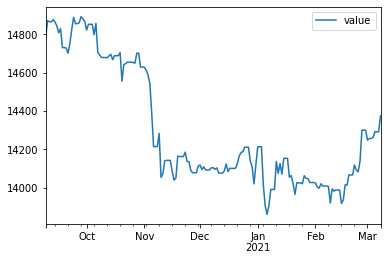

In [11]:
df.plot()


From the plot it is clear that from October to early November that the value of 1 USD is above 14500 IDR. Then in mid November the value of USD weakens to be about 14000 IDR and in January it drops even lower to below 14000 IDR. In mid February, USD becomes strong again with respect to IDR and there is an unsteady increase  so that 1 USD is now worth about 14400 IDR. 

In conclusion USD had a drop from mid November to mid February and now seems to be recovering.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.